In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from utils import plot_tree_boundaries

features = ['age','acutephysiologyscore']
outcome = 'actualhospitalmortality'

data = pd.read_csv('eicu_processed.csv')

x = data[features]
y = data[outcome]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state =  42)

# Larger Depth Trees

In the previous episode we created a very simple decision tree. Let’s see what happens when we introduce new decision points by increasing the depth.

**Task:** Using the template code from the previous workbook, and the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), train a decision tree with `max_depth` of 5. Plot the decision tree using `plot_tree_boundaries`.

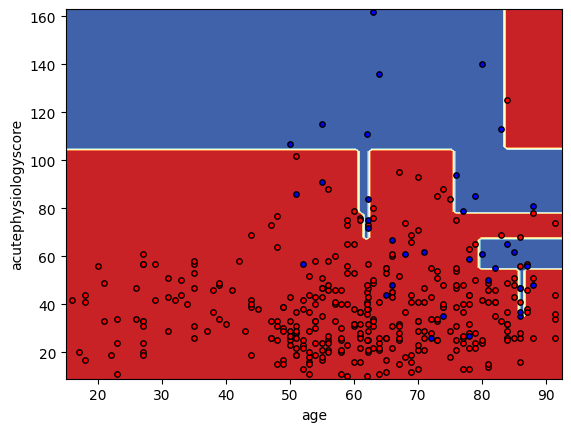

In [17]:
from sklearn import tree
import matplotlib.pyplot as plt

# train model
model = tree.DecisionTreeClassifier(max_depth=5)
model = model.fit(x_train, y_train)

# plot tree
plot_tree_boundaries(model, x_train, y_train, features, ['Alive', 'Dead'])

Now our tree is more complicated! We can see a few vertical boundaries as well as the horizontal one from before. Some of these we may like, but some appear unnatural. Let’s look at the tree itself.

<Figure size 640x480 with 0 Axes>

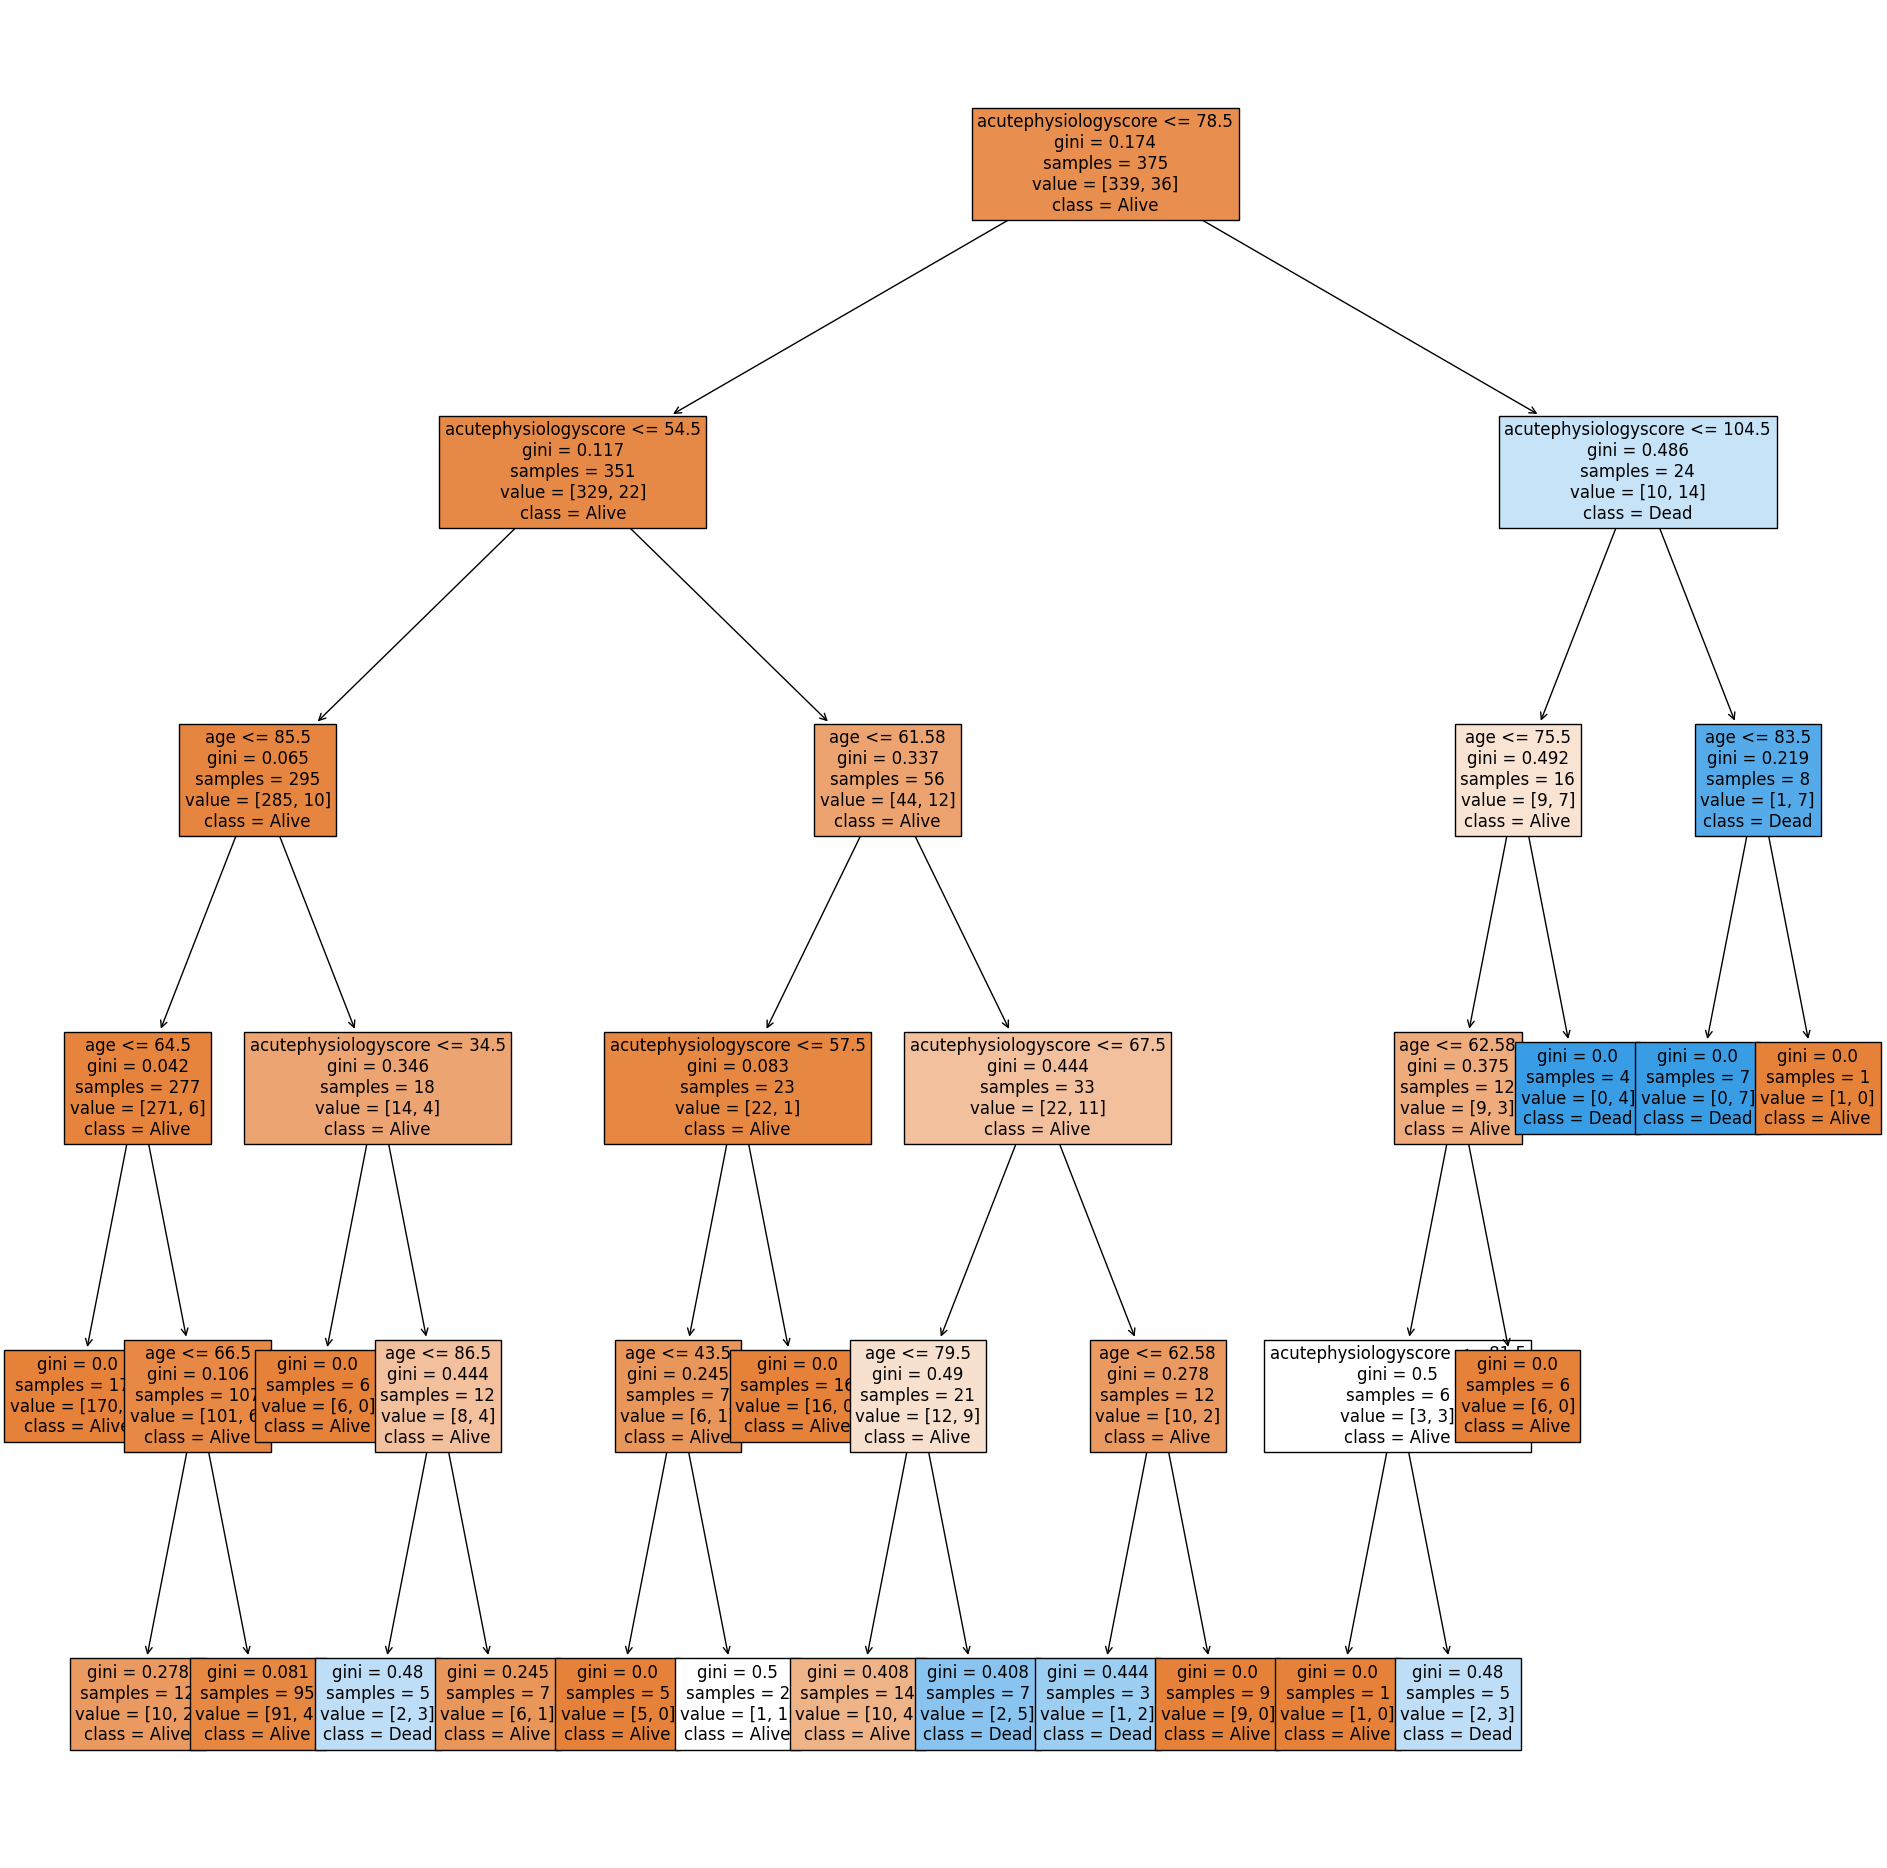

In [11]:
plt.clf()
plt.figure(figsize=(24, 24))
tree.plot_tree(model, filled=True, feature_names=features, class_names=['Alive', 'Dead'], fontsize=12)
plt.show()

Looking at the tree, we can see that there are some very specific sets of rules - e.g., there are some leaves with only 1 or 2 samples.

**Question:** Consider a patient aged 45 years with an acute physiology score of 100. Using the image of the tree, work through the nodes until your can make a prediction. What outcome does your model predict?

**Question:** What is the gini impurity of the final node, and why?

**Question:** Does the decision that led to this final node seem sensible Why?

This specifcity shows that our model is overfitting to the training data. Overfitting is a problem that occurs when our algorithm is too closely aligned to our training data, and often occurs when we use a powerful technique to model simple data.

The result is that the model may not generalise well to “unseen” data, such as observations for new patients entering a critical care unit - the model knows what to do in settings that closely follow the training data, but has no knowledge of data outside of this very narrow distribution. 

There are techniques we can employ that try to address this problem. This is where “pruning” comes in.

## Pruning

Let's run pruning, run the model again and see what it does.

**Task:** Look at the sklearn documentation, and train a decision tree with `max_depth` and `min_samples_leaf` of 5.

<Figure size 640x480 with 0 Axes>

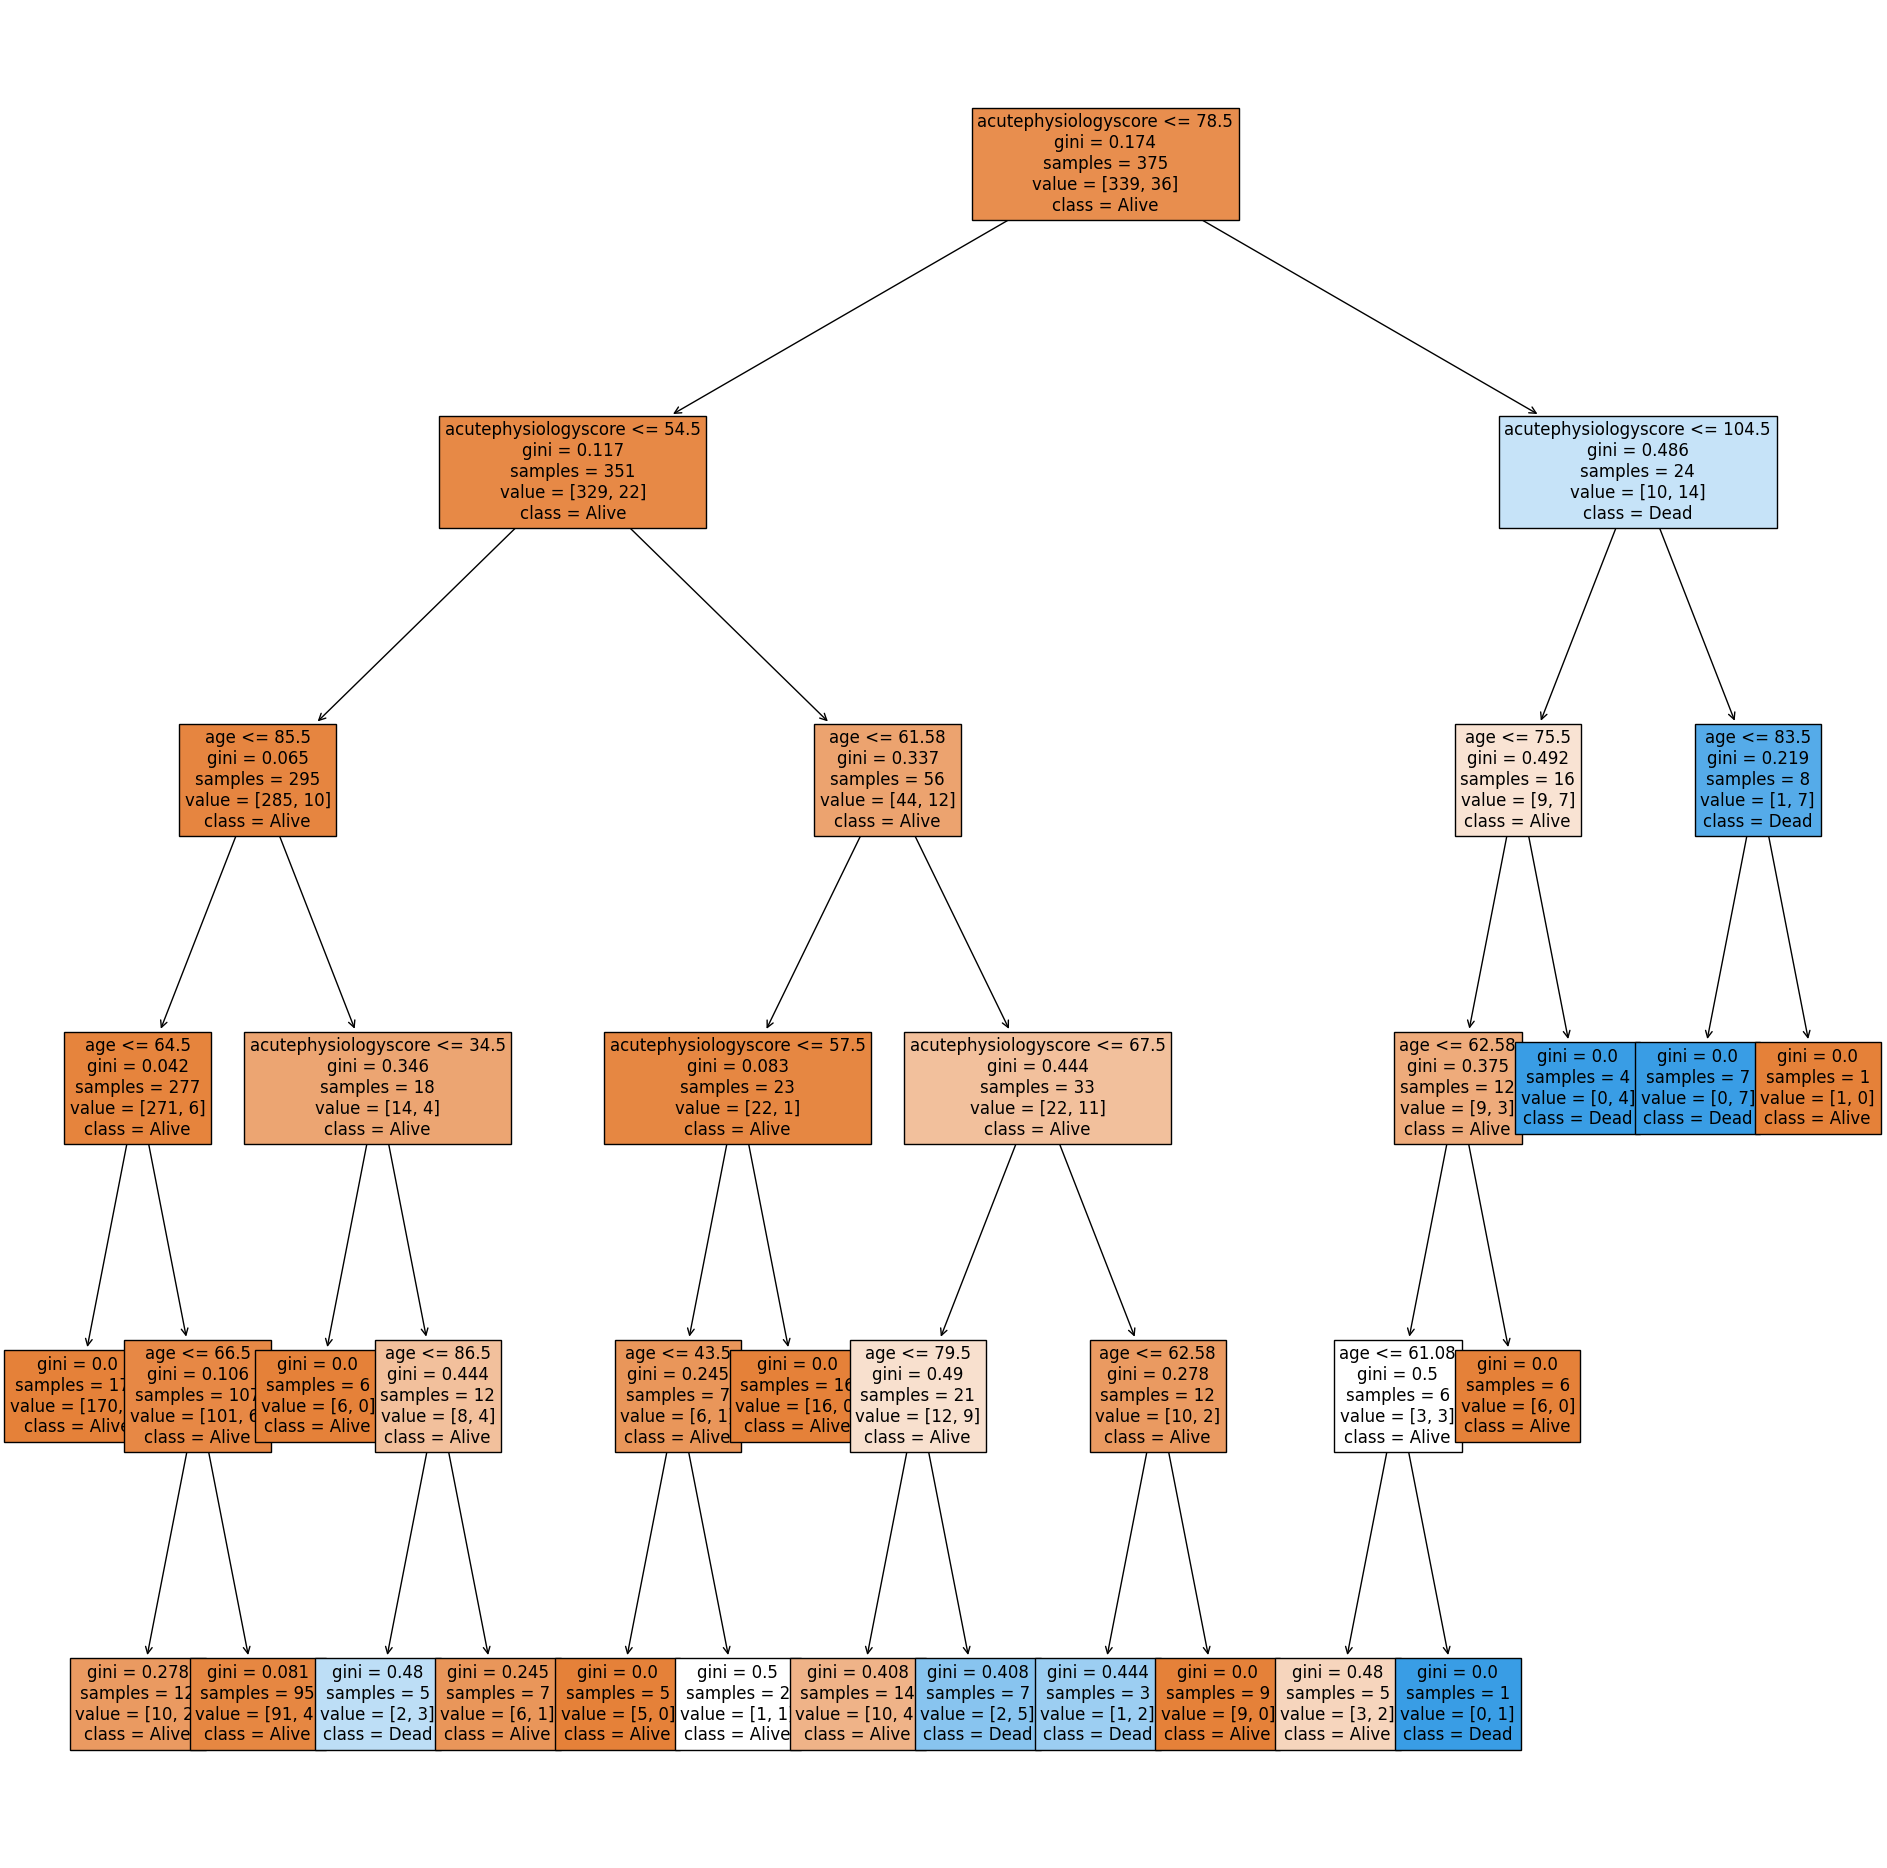

In [12]:
# train model
model2 = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
model2 = model.fit(x_train, y_train)

# Plot tree
plt.clf()
plt.figure(figsize=(24, 24))
tree.plot_tree(model, filled=True, feature_names=features, class_names=['Alive', 'Dead'], fontsize=12)
plt.show()

**Question:** Compare the new tree to the previous one - what's different?

We can see that our second tree is (1) smaller in depth, and (2) never splits a node with <= 10 samples. We can look at the decision surface for this tree:

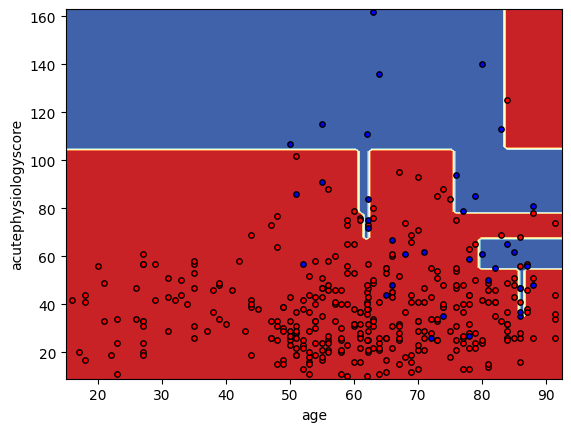

In [13]:
plot_tree_boundaries(model, x_train, y_train, features, ['Alive', 'Dead'])

Our pruned decision tree has a more intuitive boundary, but does make some errors. We have reduced our performance in an effort to simplify the tree. This is the classic machine learning problem of trading off complexity with error.

Note that, in order to do this, we “invented” the minimum samples per leaf node of 10. Why 10? Why not 5? Why not 20? The answer is: it depends on the dataset. Heuristically choosing these parameters can be time consuming, and we will see later on how gradient boosting elegantly handles this task.

## Decisions trees have "high variance"

Decision trees have high “variance”. In this context, variance refers to a property of some models to have a wide range of performance given random samples of data. Let’s take a look at randomly slicing the data we have to see what that means.

<Figure size 1200x300 with 0 Axes>

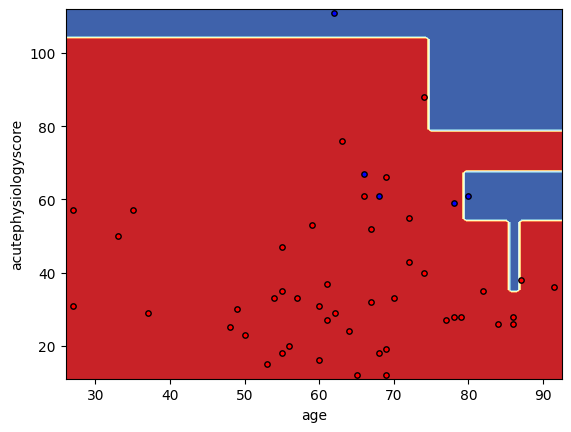

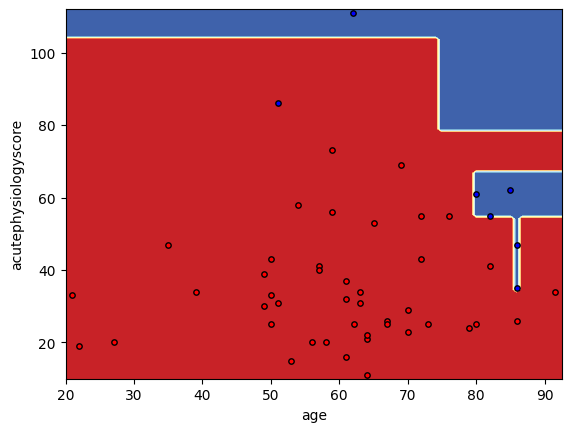

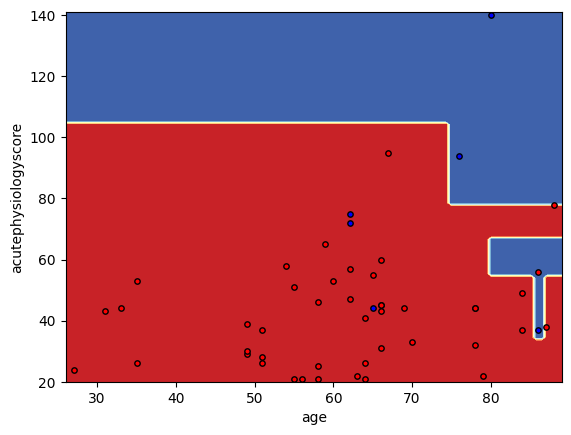

In [15]:
import numpy as np

np.random.seed(123)

fig = plt.figure(figsize=[12,3])

for i in range(3):
    # generate indices in a random order
    idx = np.random.permutation(x_train.shape[0])
    
    # only use the first 50
    idx = idx[:50]
    x_temp = x_train.iloc[idx]
    y_temp = y_train.values[idx]
    
    # initialize the model
    model = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
    
    # train the model using the dataset
    model = model.fit(x_train, y_train)
    plot_tree_boundaries(model, x_temp, y_temp, features, ['Alive', 'Dead'])

Above we can see that we are using random subsets of data, and as a result, our decision boundary can change quite a bit. As you could guess, we actually don’t want a model that randomly works well and randomly works poorly.

There is an old joke: two farmers and a statistician go hunting. They see a deer: the first farmer shoots, and misses to the left. The next farmer shoots, and misses to the right. The statistician yells “We got it!!”.

While it doesn’t quite hold in real life, it turns out that this principle does hold for decision trees. Combining them in the right way ends up building powerful models.

**Question:** Why are decision trees considered have high variance?

**Question:** An “ensemble” is the name used for a machine learning model that aggregates the decisions of multiple sub-models. Why might creating ensembles of decision trees be a good idea?